In [3]:
# -*- coding: utf-8 -*-
###
# Demonstration of MR reconstruction with CCP PET-MR Software
#
# This demonstration shows how to reconstruct MR images from fully sampled 
# Cartesian k-psace data.
# Additional information on the MR raw data format is provided.
#
# This demo is a 'script', i.e. intended to be run step by step in a
# Python IDE such as spyder. It is organised in 'cells'. spyder displays these
# cells nicely and allows you to run each cell on its own.
#
# First version: 27th of May 2017
# Updated: 1st of April 2019
# Author: Christoph Kolbitsch, Johannes Mayer
#

## CCP PETMR Synergistic Image Reconstruction Framework (SIRF).
## Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC.
## Copyright 2015 - 2017 University College London.
## Copyright 2015 - 2017 Physikalisch-Technische Bundesanstalt.
##
## This is software developed for the Collaborative Computational
## Project in Positron Emission Tomography and Magnetic Resonance imaging
## (http://www.ccppetmr.ac.uk/).
##
## Licensed under the Apache License, Version 2.0 (the "License");
##   you may not use this file except in compliance with the License.
##   You may obtain a copy of the License at
##       http://www.apache.org/licenses/LICENSE-2.0
##   Unless required by applicable law or agreed to in writing, software
##   distributed under the License is distributed on an "AS IS" BASIS,
##   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
##   See the License for the specific language governing permissions and
##   limitations under the License.

In [6]:
__version__ = '0.1.0'

# import engine module
import pGadgetron as pMR

# import further modules
import os
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [7]:
#%% GO TO MR FOLDER
os.chdir(pMR.petmr_data_path('mr'))



### Fully Sampled Reconstruction
#### Goals of this notebook:
- Make sure everybody has a working version of SIRF.
- Achieve mastery in running Jupyter notebookes.
- Schematic knowledge of ISMRMRD format.
- Schematic knowledge of MR reconstruction with SIRF.
- Minimalistic introduction into Python.
- Reconstruct our first MR image.


### Synergistic Image Reconstruction Framework (SIRF) for MRI
Now to the question everybody has been asking themself: __[What is SIRF?](https://www.youtube.com/watch?v=HEXWRTEbj1I])__  
The __Synergistic Image Reconstruction Framework__ is:
- an open source reconstruction framework for PET-MR.
- has a Matlab and Python interface.
- coupled to the MR open source reconstruction engine '__The Gadgetron__' (a whole universe on its own).

Of course, nobody expects you to already know any of the functions and classes we will see today.
If you want to use SIRF there is a [software documentation](https://github.com/CCPPETMR/SIRF/wiki/Software-Documentation) where there is a complete list of what you want to know.

![what_is_sirf_baby_dont_hurt_me.png](attachment:what_is_sirf_baby_dont_hurt_me.png)


### Reasons to use an open-source registration framework:
- be __independent__ of what your vendor provides as image output.
- __develop__ and implement __new techniques__ with the output of your scanner.
- __profit from__ the latest __developments__ in the field which are shared.


#### We will use SIRF to 
- send data to The Gadgetron and get reconstructions back.
- extract MRI data and process it on our own using SIRF functionality.

### Hence we need to start The Gadgetron!
Open a new terminal with `Ctrl + Alt + t` and type the word `gadgetron` and press enter.  
Afterwards come back here to the notebook.


## ISMRM Raw Data (ISMRMRD) Format

MR raw- (or acquisition-) data is stored in a multitude of different data formats depending on the system vendor ( Siemens, GE, Philips, Bruker etc.). However, there is also an open-source file format available.
There is an open-source magnetric resonance raw data or acquisition data format which carries the extension ".h5".

A wholesome explanation and introduction into the file format is provided on the [ISMRMRD website](http://ismrmrd.github.io/).

Of course to make the file format feasible, MR raw data formats from different vendors can be transformed to  HDF file format using siemens_to_ismrmrd, philips_to_ismrmrd or bruker_to_ismrmrd available on the [ISMRMRD Github]( https://github.com/ismrmrd/ ).



### ISMRMRD Schematic Overview 
#### Raw and Metadata
To have a self-contained acquisition data output from the scanner the files contain one data portion and one header portion.

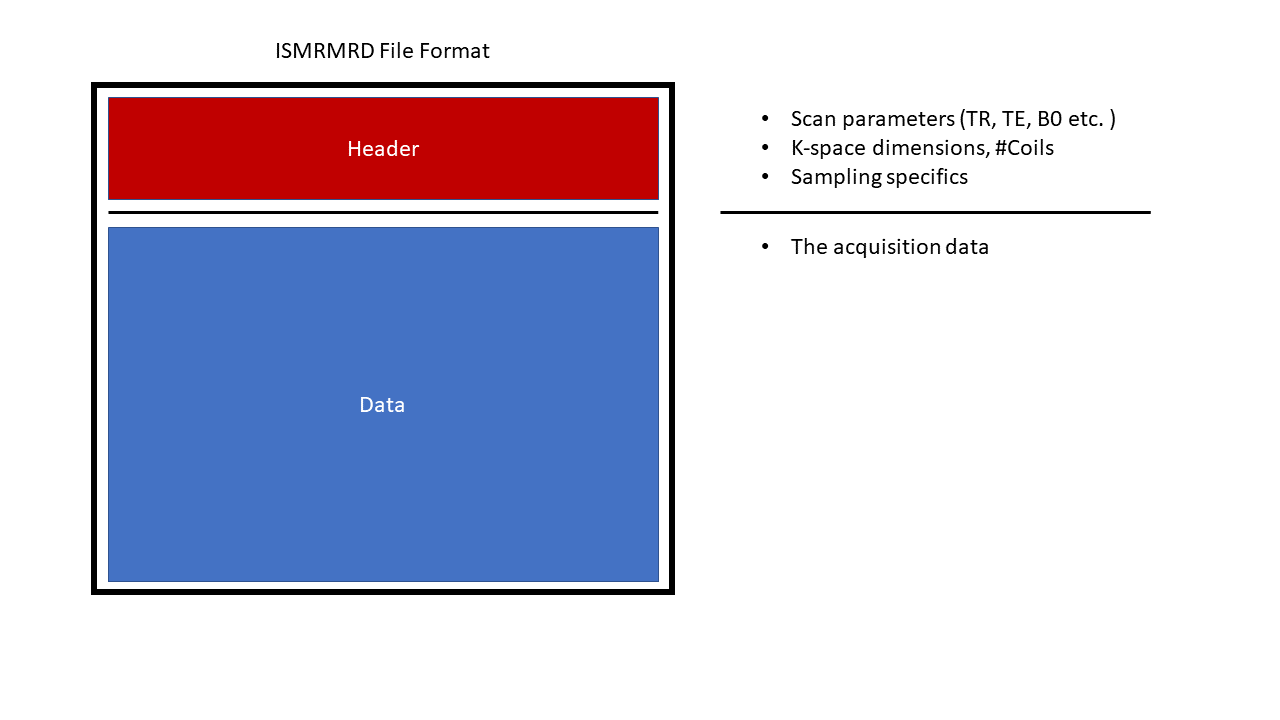
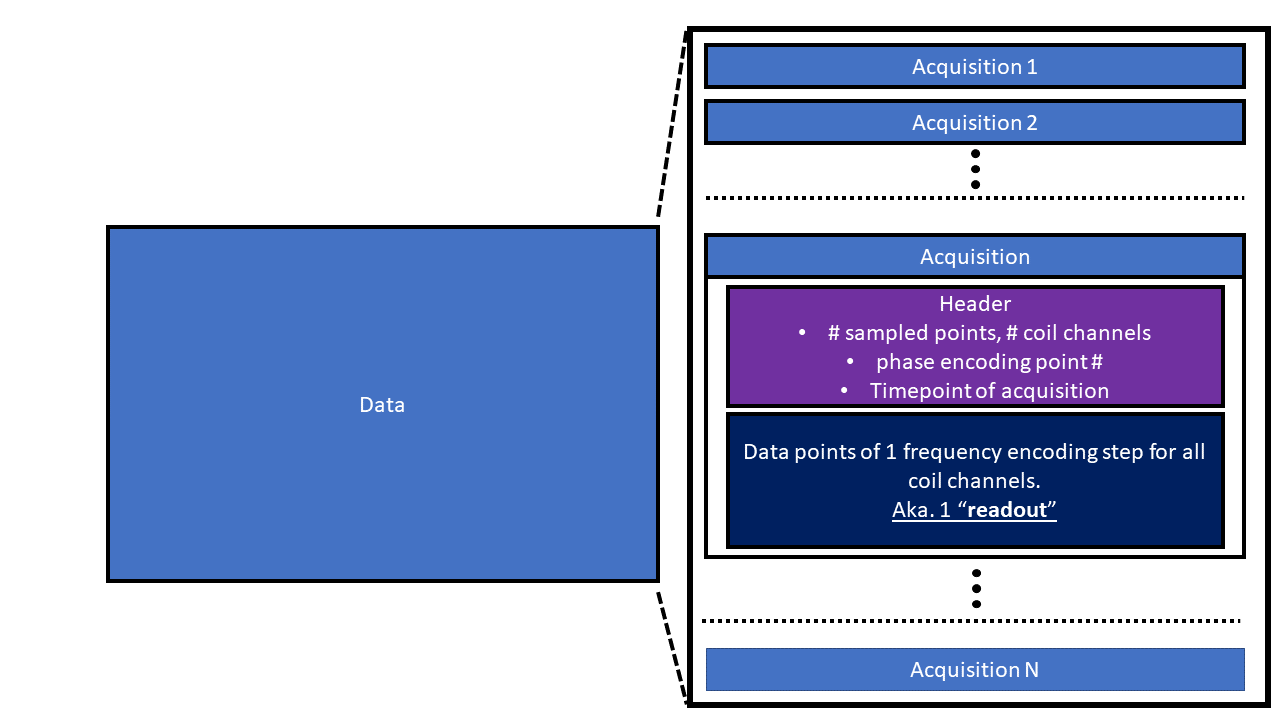

In [8]:
#%% LOAD RAW MR DATA
filepath = 'ptb_resolutionphantom_fully_ismrmrd.h5' 
acq_data = pMR.AcquisitionData(filepath)


#### A note on Python programming 

The functionalities of the Synergistic Image Reconstruction Framework (SIRF) on the MR side are available in the package `pMR`. So whenever we want to call anything from this package we must preceed the call with `pMR.` (the dot is important).

As you might be familiar with from other languages you can create objects in Python which cluster together data and functionality. This clustering is called a __class__ . 

In this case the object is a variable named `acq_data` and is of __class__ `AcquisitionData`. As you can see the prefix `pMR.` appears because `AcquisitionData` is defined in `pMR`.

The object `acq_data` is  generated by calling the __constructor__ of the class. The constructor is the name of the class itself. As you can see the constructor of `AcquisitionData` takes an argument, namely a string, which is the name of the .h5 file with the acquisition data. 

__Please remember this syntax you will need it later in small programming tasks.__

### Preprocessing MR Acquisition Data 

Prior to image reconstruction several pre-processing steps must be undertaken.  
These include
- asymmetric echo compensation
- noise decorrelation for multi-coil data
- removal of oversampling along frequency encoding ( also called "readout" or "kx" -direction).


In [9]:
#%% PRE-PROCESSING CELL
# preprocessed_data = acq_data 
preprocessed_data = pMR.preprocess_acquisition_data(acq_data)



#### Another note on Python programming 

As you can see, we now used a function call from the `pMR` package to act on the object we created before.
(Just as in many other programming languages) The syntax is of the form:
```
output = function_name( argument )
```


In [10]:
#%% SETUP MR RECONSTRUCTION
# create a reconstruction object using 2D inverse Fourier transform 
recon = pMR.FullySampledReconstructor()

#%% PASS RAW DATA TO RECONSTRUCTOR
recon.set_input(preprocessed_data)

### A last note on Python programming
The last two lines of code contained the syntax of how to call the functionality of an object.  
We see that a variable called `recon` is created and assigned the call to the constructor of the class `FullySampledReconstructor`. This constructore does not take any argument.  

Since classes cluster together data and the functionality of how to act on the data, this functionality must be accessible somehow. The functions which are associated to a class are called __methods__. 
You can call them by writing:
```
output = variable_name.method_name( arguments )
```
The object `recon` possesses the __method__ `set_input` which takes as argument `AcquisitionData`. It does not return anything.  
__Please remember how to call methods of an object, you will need it later on.__


In [11]:
#%% PERFORM RECONSTRUCTION
# We encounter another method of the class FullySampledReconstructor, namely process
recon.process()

In [12]:
#%% RETRIEVE AND VIEW IMAGE
image_data = recon.get_output()
image_array = abs(image_data.as_array())
image_array = image_array/image_array.max()

plt.close()
plt.figure(1)
plt.set_cmap('gray')
plt.imshow(image_array[0,:,:], vmin=0, vmax=0.7)
plt.title('Reconstructed image data (magnitude)') 





In [36]:
plt.close('all')

### Recap
#### We just learned how
- to run a Jupyer notebook.
- data is stored in the ISMRMRD format.
- to call Python functionality from the pMR package.
- to reconstruct fully sampled MR kspace data using SIRF.
